In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def approche_gloutonne(G):
    S = len(G[0])-1
    return_tab = []
    for i in range(len(G)):
        return_tab.append([])
        return_tab[i].append(0)
        for j in range(S):
            return_tab[i].append(-1)

    temp_s = S
    while(temp_s > 0 ):
        indic_to_put = getMaxGain(G,return_tab)
        for i in range(1,S+1):
            if(return_tab[indic_to_put][i] == -1):
                return_tab[indic_to_put][i] = G[indic_to_put][i]
                break
        temp_s -= 1
    return return_tab


def getMaxGain(G, already_done):
    indic = 0
    max = -1
    indic_max = 0
    for elem in already_done:
        indic_not_done = 0
        for i in range(len(elem)):
            if(elem[i] == -1):
                indic_not_done = i
                break
        
        if( indic_not_done == 0):
            continue
            
        diffGain = G[indic][indic_not_done] - G[indic][indic_not_done-1]
        if(diffGain > max):
            max = diffGain
            indic_max = indic
        indic += 1

    return indic_max

In [3]:
def approche_optimale(G) : # G[0:n+1]][0:S+1] est de terme général G[i][s] = g(i,s) = gain obtenu
# par la livraison d'un stock s à l'entrepôt de numéro i.
    n = len(G) ; S = len(G[0]) - 1; 
    M = [[-1 for s in range(S+1)] for k in range(n+1)] # -1, ou une valeur quelconque.
    A = [[0 for s in range(S+1)] for k in range(n+1)] # 0 ou une valeur quelconque.
    # base de la récurrence : m
    for s in range(S+1) : M[0][s] = 0     # m(0,s) = 0 qqsoit s, 0 ≤ s < S+1
    # cas général : par taille k croissante, calculer et mémoriser toutes les valeurs m(k,s)
    # qqsoit k, qqsoit s, 1 ≤ k < n+1, 0 ≤ s < S+1
    # m(k,s) =  max_{0 ≤  s' < s+1} ( g(k-1,s') + m(k-1,s-s') )
    for k in range(1,n+1) : # par tailles k croissantes
        for s in range(0,S+1) : # pour tout stock s 
            # calculer m(k,s) = max_{0 ≤  s' < s+1} ( g(k-1,s') + m(k-1,s-s') )
            for sprime in range(0,s+1) : 
                mks = G[k-1][sprime] + M[k-1][s-sprime]
                if mks > M[k][s] :
                    M[k][s] = mks
                    A[k][s] = sprime
    return M,A

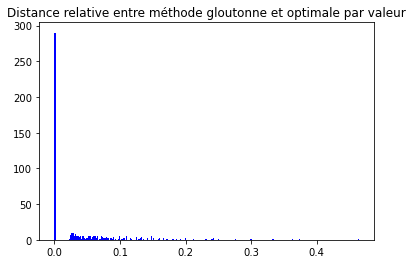

In [4]:
## Main ##

optimal_list = []
glouton_list = []
dist_list = []

for x in range(500):
    S = random.randint(3,10)
    N = random.randint(3,15)
    G = []
    for i in range(N):
        G.append([0])
        for j in range(1,S):
            G[i].append( G[i][j-1] + random.randint(0,5) )

    ### Approche gloutonne ###
    M_glouton = approche_gloutonne(G)

    # Calcul gain maximal glouton #
    max_gain = 0
    for elem in M_glouton:
        for i in range(1,len(elem)):
            if(elem[i] == -1):
                max_gain += elem[i-1]
                break
            if(i+1 == len(elem)):
                max_gain += elem[i]
                break

    ### Approche optimale ###
    MA = approche_optimale(G)
    A = MA[1]        # A[0:n+1][0:S+1] de terme général a(k,s) = argmax m(k,s)
    n = len(A) - 1 ; S = len(G[0]) - 1
    M = MA[0]


    optimal_list.append(M[n][S])
    glouton_list.append(max_gain)
    dist_list.append((M[n][S] - max_gain) / M[n][S])

num_bins = len(dist_list)//2
plt.hist(dist_list, num_bins, facecolor = 'blue', alpha = 1 )
plt.title("Distance relative entre méthode gloutonne et optimale par valeur")
plt.show()